<p style="text-align:center; font-family:Tahoma; font-size:60px; font-weight:bold;">
به نام خدا</p>
<h2 style='text-align:center;'>اجرای عملی پروژه مقاله در جوپیتر نوت بوک</h2>



<div style="text-align: right"> 

    عنوان مقاله :زیرساخت گسترده و مبتنی بر قصد شبکه سازی مجموعه داده ها
    برای شبکه های خودگردان مبتنی بر هوش مصنوعی در نسل پنجم و فراتر از آن
    درس : شبکه های مخابراتی 
    استاد : دکتر مهدی اسلامی
    
</div>


<img src="https://upload.wikimedia.org/wikipedia/commons/9/95/SRBIAU_logo.png" width="200" height="150">

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
DATA =pd.read_csv('C:/Users/Lenovo/Documents/University/network/iwib5gnet_v0.csv')

In [20]:
# agar data ziad hast va parsazesh nashod stoon haye numerical ra faghat analiz konid va baghy data ra hazf konid
#DATA = DATA.drop(columns=['iface','IPTAB_activated','OVS_activated','TC_activated','TC_queueDiscipline','encapsulationType1','sense','state','programmableTechnology','actionType','actionName','OVS_RX_dropped','AbstractionLayer','OVS_RX_dropped','OVS_TX_dropped','TC_current_bwd_guaranteed','TC_TX_bytes','TC_TX_dropped','TC_TX_packets','l3Proto','macSrc','macDst','tos','outTos'])

In [21]:
DATA.head()

,hostname,ContextSwitchesPerSecond,AbstractionLayer,iface,iface_speed,IPTAB_activated,IPTAB_complexity,IPTAB_maxRules,IPTAB_RX_bytes,IPTAB_RX_packets,...,TC_MEDIAN_CRR,TC_ST_CRR,TC_Q1_CRR,TC_Q3_CRR,TC_MEAN_TOTAL,TC_MEDIAN_TOTAL,TC_ST_TOTAL,TC_Q1_TOTAL,TC_Q3_TOTAL,timestamp
0,EDGE-IAAS-0-COMPUTE-1,1,0,eth6,10000000000,False,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.689858e+09
1,EDGE-IAAS-0-COMPUTE-1,4,0,eth7,10000000000,False,0.0,0.0,0.0,0.0,...,123.5,11.299889,116.0,135.5,7573.5,7590.0,1505.941151,6068.0,9079.0,1.689797e+09
2,EDGE-IAAS-0-COMPUTE-2,4,0,eth0,10000000000,True,8.0,4096.0,2077635.0,9443.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.694793e+09
3,EDGE-IAAS-0-COMPUTE-2,3,0,eth6,10000000000,False,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.689853e+09
4,EDGE-IAAS-0-COMPUTE-1,9,0,eth7,10000000000,False,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.689857e+09


<Axes: >

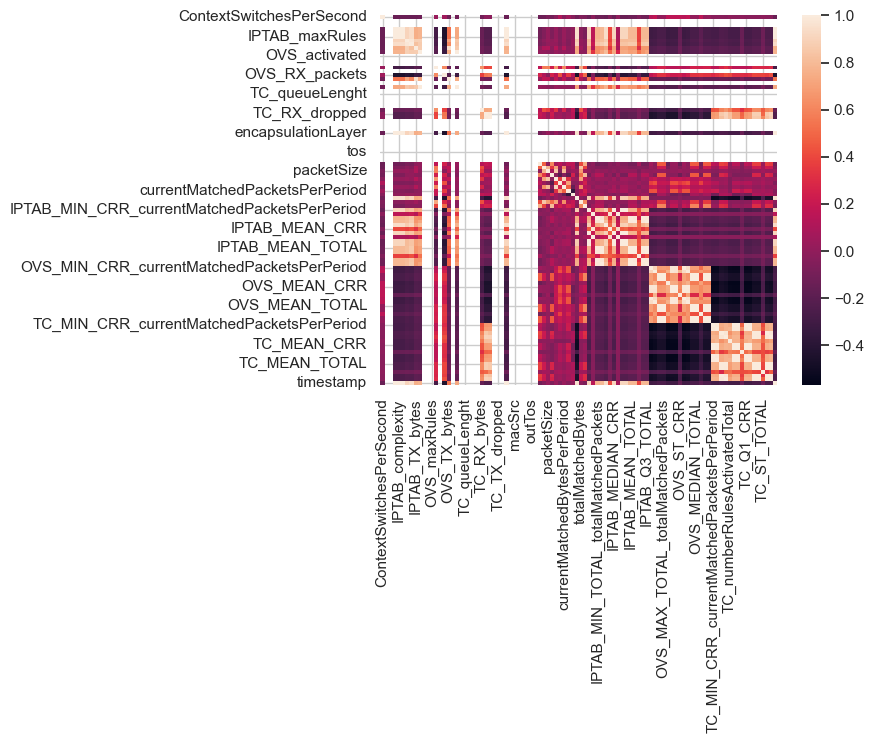

In [22]:
sns.heatmap(DATA.corr(numeric_only=True))

<Axes: xlabel='programmableTechnology', ylabel='totalMatchedPackets'>

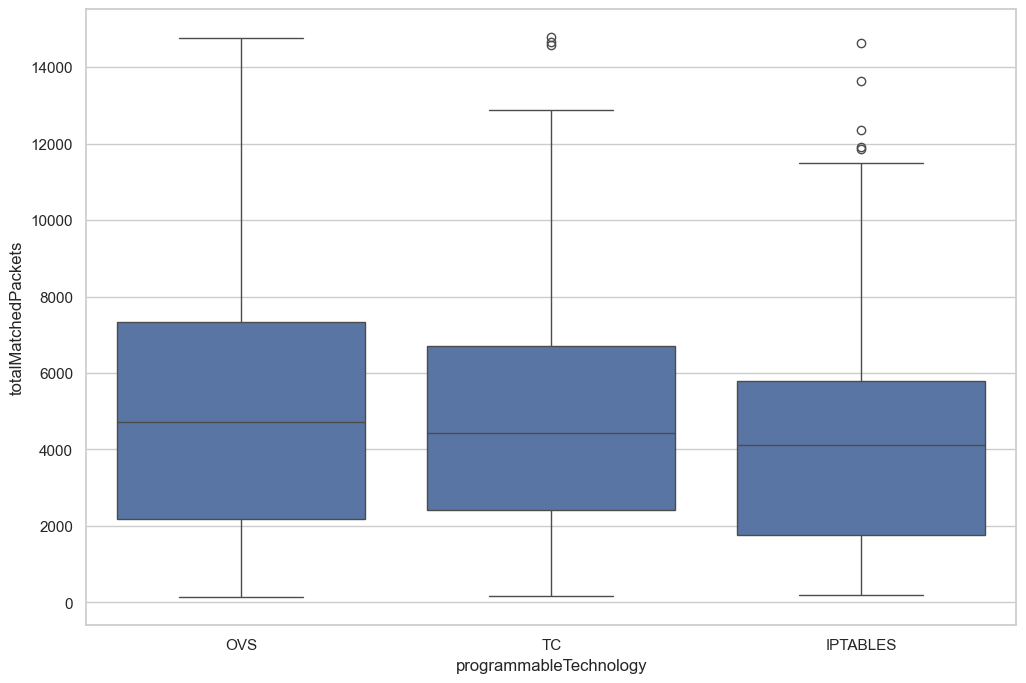

In [23]:
plt.figure(figsize=(12,8))
sns.boxplot(x='programmableTechnology',y='totalMatchedPackets',data=DATA)

<Axes: xlabel='programmableTechnology', ylabel='count'>

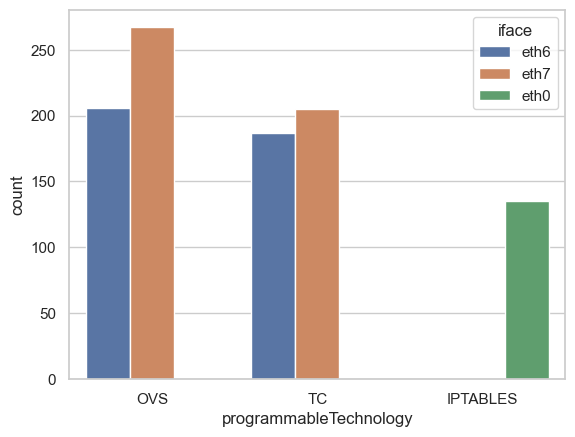

In [24]:
sns.countplot(x='programmableTechnology',hue='iface',data=DATA)

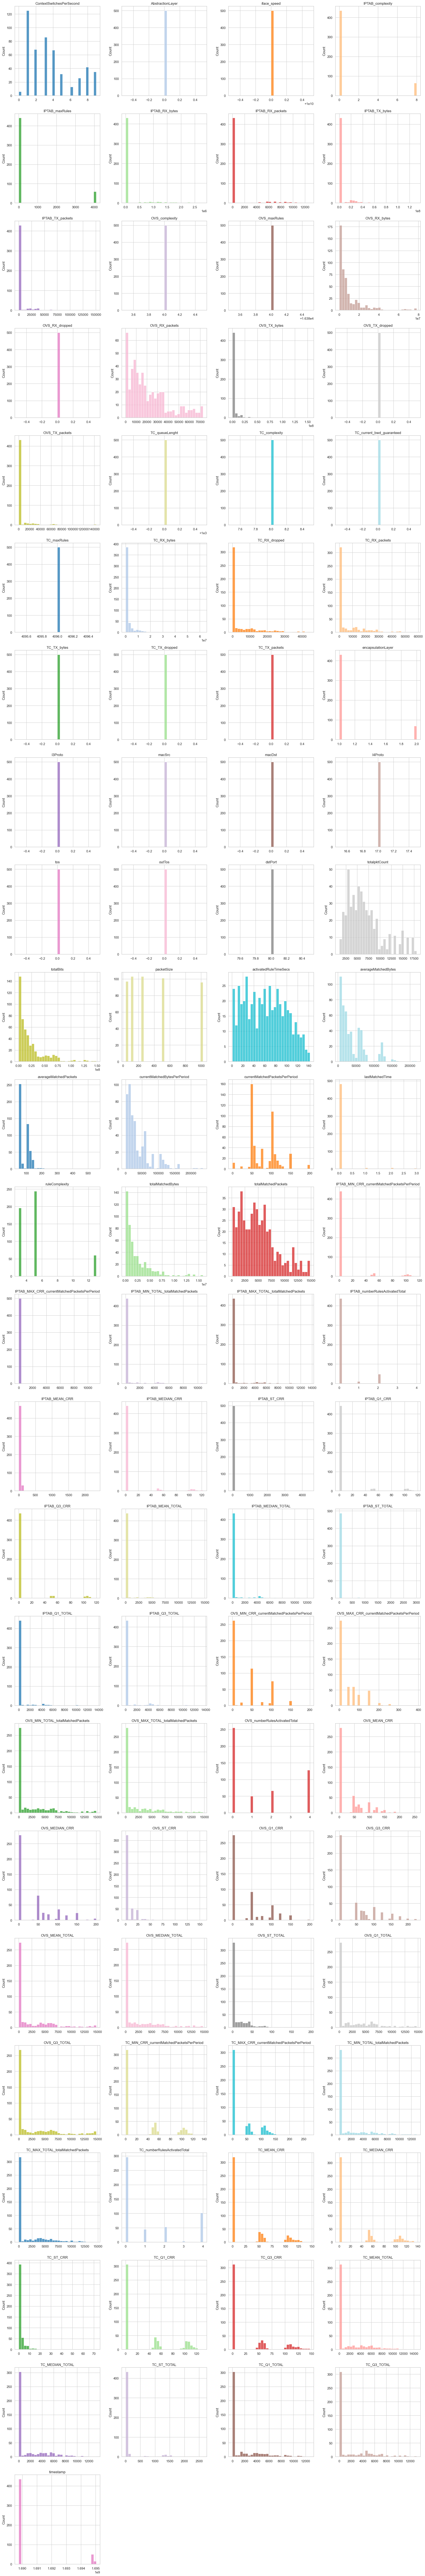

In [25]:
num_cols = DATA.select_dtypes(include=[np.number]).columns.tolist()
n = len(num_cols)

cols = 4
rows = int(np.ceil(n / cols))

fig, axes = plt.subplots(rows, cols, figsize=(20, 5*rows))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sample = DATA[col].dropna().sample(frac=0.5, random_state=i)
    sns.histplot(sample, bins=30, kde=False,
                 color=sns.color_palette("tab20")[i % 20], ax=axes[i])
    axes[i].set_title(col, fontsize=12)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Count")

for j in range(len(num_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

IndexError: list index out of range

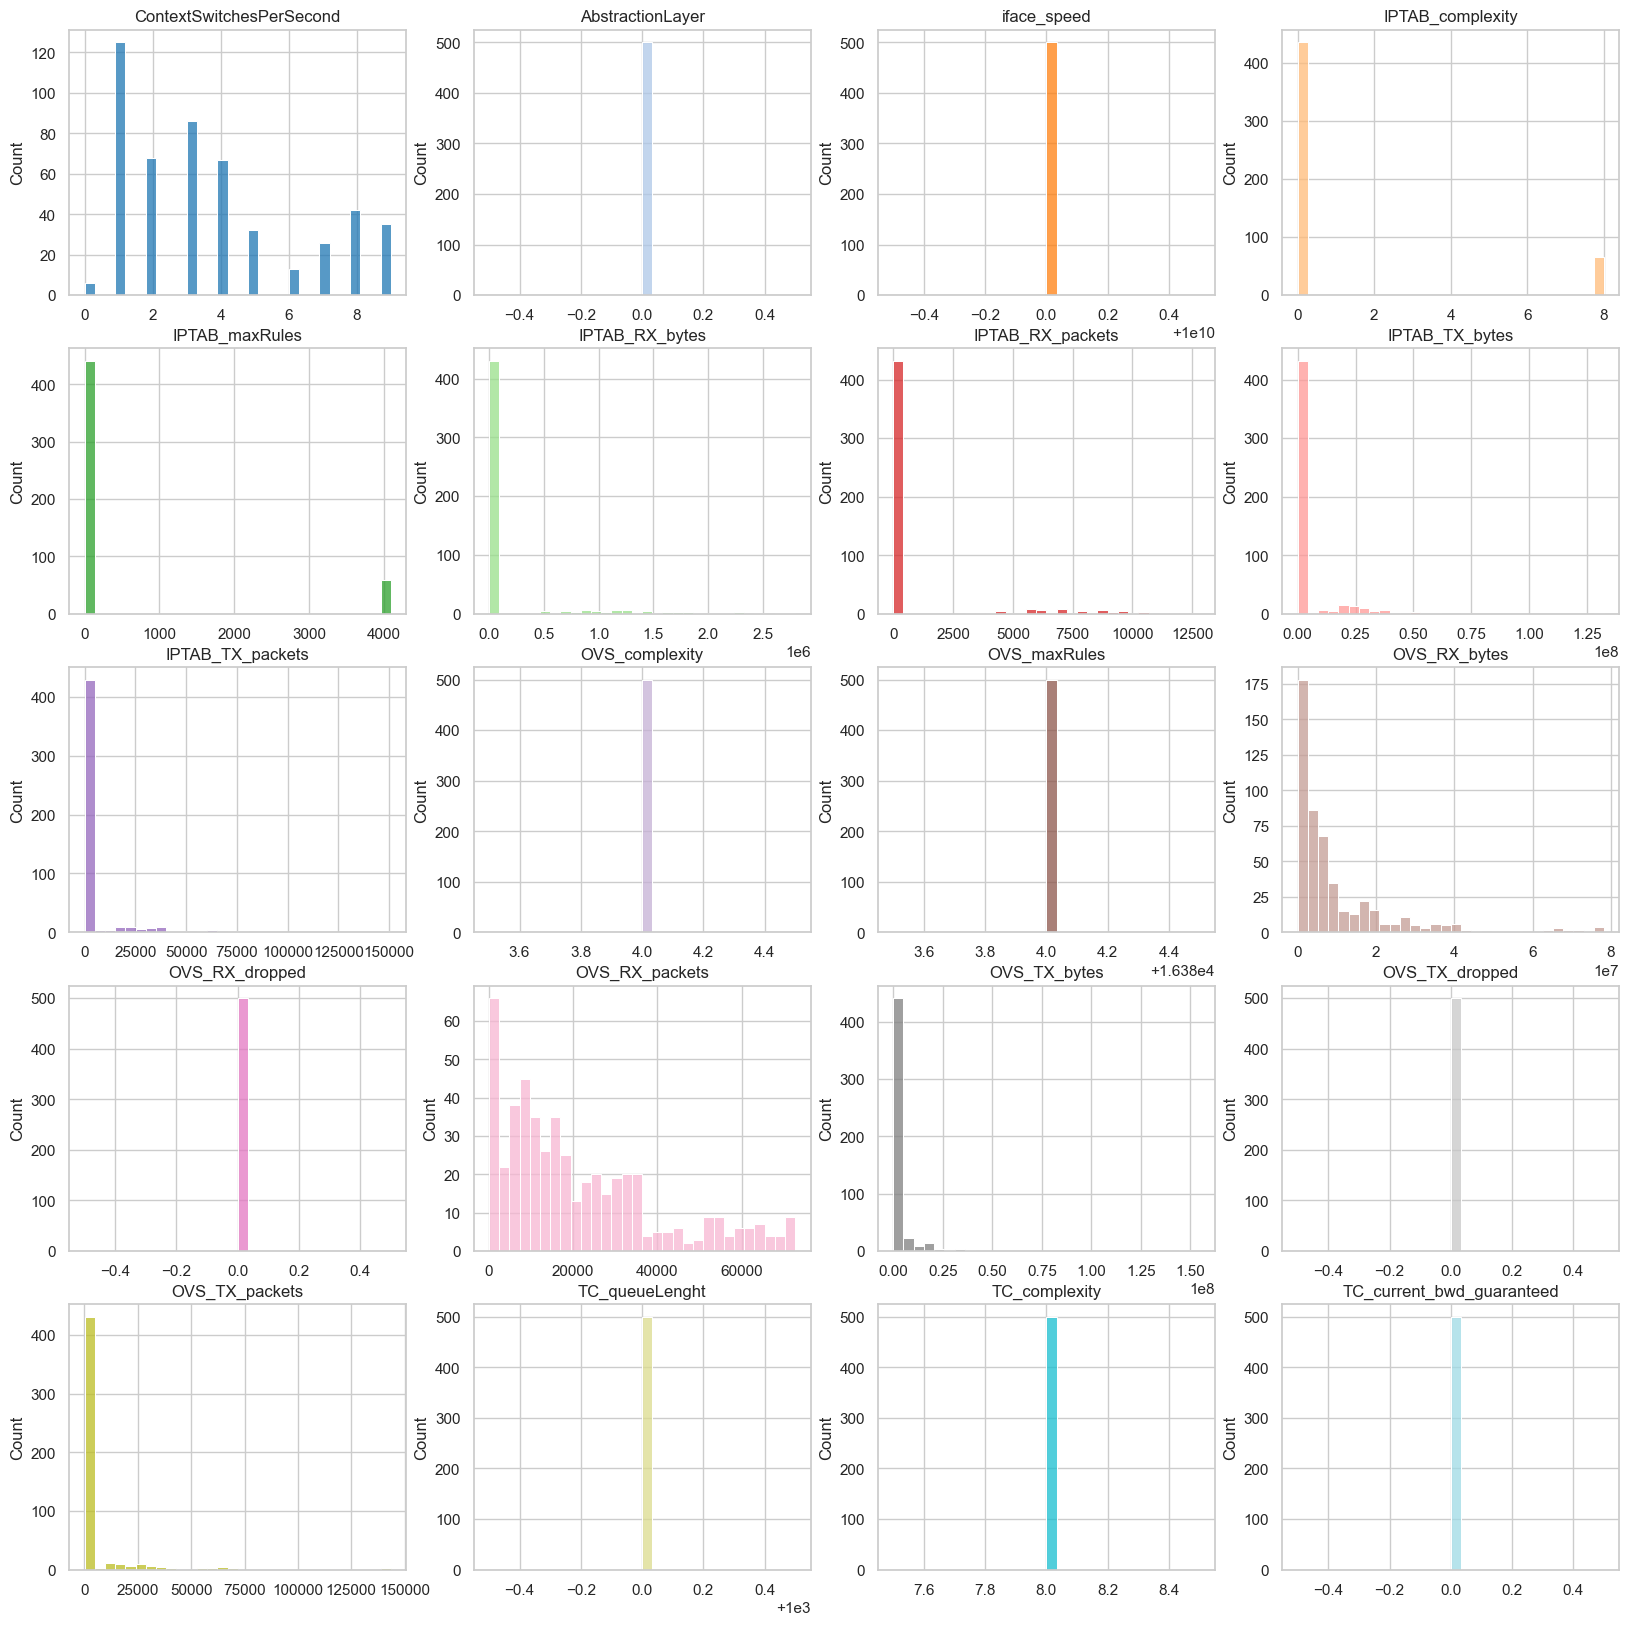

In [26]:
num_cols = DATA.select_dtypes(include=[np.number]).columns.tolist()
sns.set(style="whitegrid")
fig, axes = plt.subplots(5, 4, figsize=(20, 20))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sample = DATA[col].dropna().sample(frac=0.5, random_state=i)  
    sns.histplot(sample, bins=30, kde=False, color=sns.color_palette("tab20")[i], ax=axes[i])
    axes[i].set_title(col, fontsize=12)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Count")

plt.tight_layout()
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12752\116144518.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Column', y='Unique Count', data=unique_counts, palette='viridis')


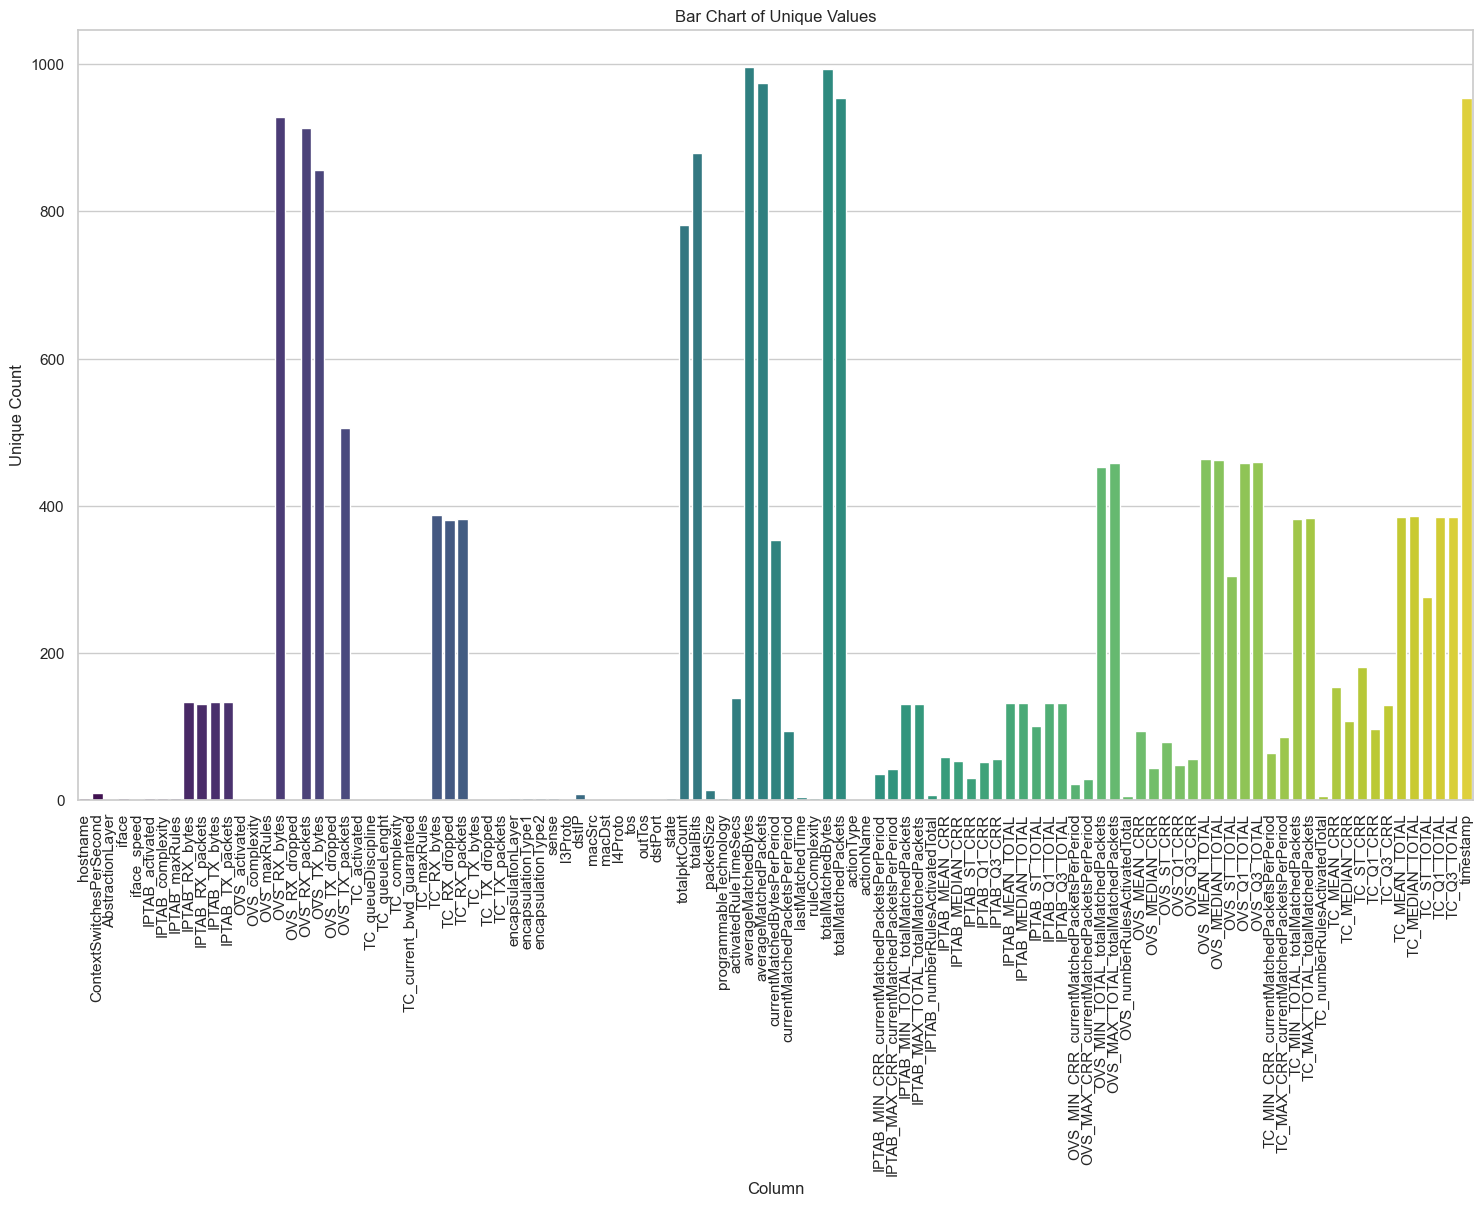

In [27]:
unique_counts = DATA.nunique().reset_index()
unique_counts.columns = ['Column', 'Unique Count']

plt.figure(figsize=(18,10))
sns.barplot(x='Column', y='Unique Count', data=unique_counts, palette='viridis')

plt.title('Bar Chart of Unique Values')
plt.xticks(rotation=90)
plt.show()

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27],
 [Text(0, 0, 'hostname'),
  Text(1, 0, 'AbstractionLayer'),
  Text(2, 0, 'iface'),
  Text(3, 0, 'iface_speed'),
  Text(4, 0, 'IPTAB_complexity'),
  Text(5, 0, 'IPTAB_maxRules'),
  Text(6, 0, 'OVS_complexity'),
  Text(7, 0, 'OVS_maxRules'),
  Text(8, 0, 'TC_queueDiscipline'),
  Text(9, 0, 'TC_queueLenght'),
  Text(10, 0, 'TC_complexity'),
  Text(11, 0, 'TC_maxRules'),
  Text(12, 0, 'encapsulationLayer'),
  Text(13, 0, 'encapsulationType1'),
  Text(14, 0, 'encapsulationType2'),
  Text(15, 0, 'l3Proto'),
  Text(16, 0, 'dstIP'),
  Text(17, 0, 'macSrc'),
  Text(18, 0, 'macDst'),
  Text(19, 0, 'l4Proto'),
  Text(20, 0, 'tos'),
  Text(21, 0, 'outTos'),
  Text(22, 0, 'dstPort'),
  Text(23, 0, 'state'),
  Text(24, 0, 'programmableTechnology'),
  Text(25, 0, 'ruleComplexity'),
  Text(26, 0, 'actionType'),
  Text(27, 0, 'actionName')])

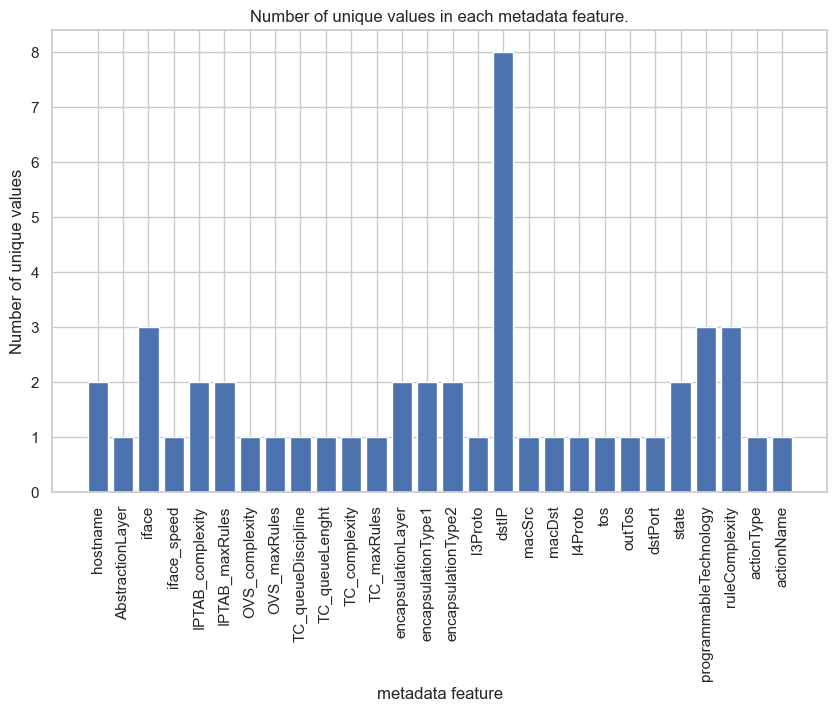

In [28]:
show = ['hostname', 'AbstractionLayer' ,'iface' ,'iface_speed' , 'IPTAB_complexity' , 'IPTAB_maxRules' , 'OVS_complexity' , 'OVS_maxRules' , 'TC_queueDiscipline' , 'TC_queueLenght' , 'TC_complexity' , 'TC_maxRules' , 'encapsulationLayer' , 'encapsulationType1' , 'encapsulationType2' , 'l3Proto' , 'dstIP' , 'macSrc' , 'macDst' , 'l4Proto' , 'tos' , 'outTos' , 'dstPort' , 'state' , 'programmableTechnology' , 'ruleComplexity' , 'actionType' , 'actionName' ]
unique_values_col1 = []
for i in show:
    unique_values_col1.append(DATA[i].unique().tolist())
output = [len(x) if isinstance(x, list) else 1 for x in unique_values_col1]
plt.figure(figsize=(10, 6))
plt.bar(show,output)
plt.title('Number of unique values in each metadata feature.')
plt.xlabel('metadata feature')
plt.ylabel('Number of unique values')
plt.xticks(rotation=90)
